In [1]:
# 訓練データとテストデータの画像を読み込む
# （サイズは縦横224pxにリサイズする）
import tensorflow as tf

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dog_cat_photos/train",
    image_size=(224, 224),
    label_mode="binary",
    batch_size=32,
    shuffle=True
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dog_cat_photos/test",
    image_size=(224, 224),
    label_mode="binary",
    batch_size=32,
    shuffle=False
)

list(train_dataset.as_numpy_iterator())[0]

Found 300 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


(array([[[[231.       , 203.       , 189.       ],
          [231.00223  , 203.00223  , 189.00223  ],
          [231.33705  , 203.33705  , 189.33705  ],
          ...,
          [240.       , 217.       , 203.       ],
          [240.       , 217.       , 203.       ],
          [240.       , 217.       , 203.       ]],
 
         [[231.       , 203.       , 189.       ],
          [231.00223  , 203.00223  , 189.00223  ],
          [231.3363   , 203.3363   , 189.3363   ],
          ...,
          [239.99852  , 216.99852  , 202.99852  ],
          [239.99777  , 216.99777  , 202.99777  ],
          [239.99777  , 216.99777  , 202.99777  ]],
 
         [[231.       , 203.       , 189.       ],
          [231.00148  , 203.00148  , 189.00148  ],
          [231.22345  , 203.22345  , 189.22345  ],
          ...,
          [239.77655  , 216.77655  , 202.77655  ],
          [239.6637   , 216.6637   , 202.6637   ],
          [239.66295  , 216.66295  , 202.66295  ]],
 
         ...,
 
         [[1

In [3]:
# 分類名（no／yes）をリストとして格納する
class_names = train_dataset.class_names
class_names

# cat = 0, dog =1


['cat', 'dog']

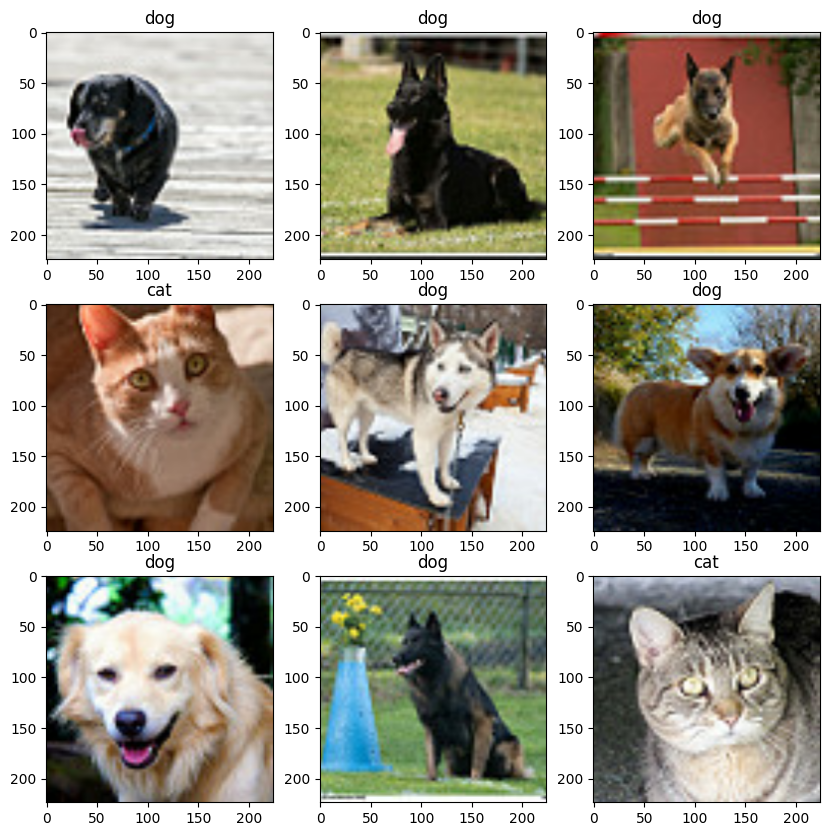

In [4]:
# 訓練データの一部を表示して確認
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy().astype("uint8")[0]])

In [5]:
# 画像の水増しをする関数の定義
def flip_left_right(image, label):   # 左右反転
    image = tf.image.flip_left_right(image)
    return image, label

def flip_up_down(image, label):      # 上下反転
    image = tf.image.flip_up_down(image)
    return image, label

def rot90(image, label):             # 反時計回りに90度回転
    image = tf.image.rot90(image)
    return image, label

def rot180(image, label):            # 反時計回りに180度回転
    image = tf.image.rot90(image, k=2)
    return image, label

def rot270(image, label):            # 反時計回りに270度回転
    image = tf.image.rot90(image, k=3)
    return image, label

In [6]:
# 画像の水増し処理の実行
train_dataset_lr     = train_dataset.map(flip_left_right)
train_dataset_ud     = train_dataset.map(flip_up_down)
train_dataset_rot90  = train_dataset.map(rot90)
train_dataset_rot180 = train_dataset.map(rot180)
train_dataset_rot270 = train_dataset.map(rot270)

In [7]:
# 水増ししたデータを訓練データに追加する
train_dataset = train_dataset.concatenate(train_dataset_lr)
train_dataset = train_dataset.concatenate(train_dataset_ud)
train_dataset = train_dataset.concatenate(train_dataset_rot90)
train_dataset = train_dataset.concatenate(train_dataset_rot180)
train_dataset = train_dataset.concatenate(train_dataset_rot270)

In [8]:
# データをシャッフルする
train_dataset = train_dataset.shuffle(32)


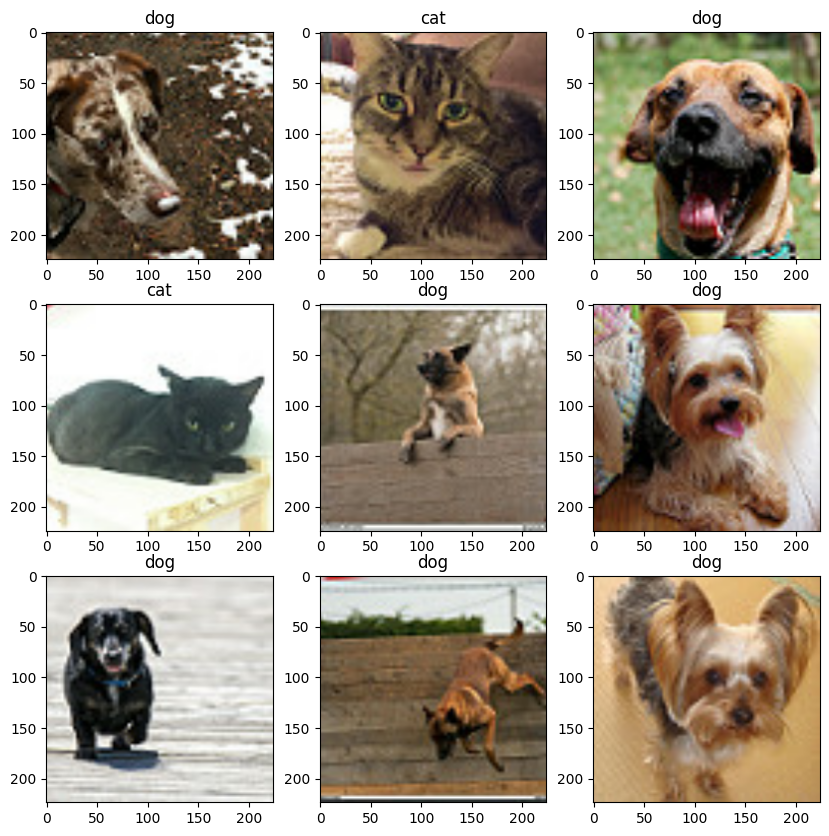

In [9]:
# 訓練データの一部を表示して確認
plt.figure(figsize=(10, 10))

for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy().astype("uint8")[0]])


In [10]:
# MobileNetV2モデルを作成する
input_layer = tf.keras.Input(shape=(224, 224, 3))   # 入力層
l_layer = tf.keras.applications.mobilenet_v2.preprocess_input(input_layer)   # 前処理（正規化）をする層

base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224, 224, 3),
    input_tensor=l_layer,
    include_top=False,
    weights="imagenet",
    pooling='avg'
)
base_model.trainable = False

In [11]:
# Dense層を追加する
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

In [12]:
# base_modelに先ほどのDense層を追加したモデルを作成する
model = tf.keras.Sequential([
    base_model,
    output_layer
])

In [13]:
# modelをcompileする
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=["accuracy"])

In [14]:
# modelに学習させる
model.fit(train_dataset, epochs=20)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 27s 372ms/step - accuracy: 0.8283 - loss: 0.3919
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 329ms/step - accuracy: 0.9261 - loss: 0.2060
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 352ms/step - accuracy: 0.9522 - loss: 0.1571
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 378ms/step - accuracy: 0.9617 - loss: 0.1281
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 29s 394ms/step - accuracy: 0.9678 - loss: 0.1132
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 315ms/step - accuracy: 0.9722 - loss: 0.0957
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 305ms/step - accuracy: 0.9806 - loss: 0.0844
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 305ms/step - accuracy: 0.9833 - loss: 0.0749
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 329ms/step - accuracy: 0.9856 - loss: 0.0675
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 319ms/step - accuracy: 0.9867 - loss: 0.0628
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 322ms/step - accuracy: 0.9900 - loss: 0.0566
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 22

In [16]:
# テストデータで分類を実行する
pred_data = model.predict(test_dataset)

# 分類した結果を確認する
pred_data

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step


array([[1.3651336e-04],
       [2.5714393e-04],
       [8.2356950e-05],
       [2.1935711e-03],
       [9.0093678e-04],
       [2.4415806e-04],
       [5.6080642e-04],
       [7.4927905e-04],
       [1.3717976e-05],
       [5.8392092e-04],
       [8.4572232e-05],
       [7.5032557e-03],
       [3.3275189e-03],
       [3.6786479e-04],
       [1.1749134e-04],
       [3.6557381e-06],
       [1.5382853e-04],
       [5.0790445e-04],
       [2.3160051e-03],
       [2.6891348e-03],
       [5.6067202e-03],
       [9.9722184e-02],
       [5.5320445e-03],
       [5.1939051e-04],
       [2.1789771e-01],
       [1.0491738e-03],
       [1.7805191e-03],
       [3.6760449e-04],
       [2.2107357e-02],
       [1.8611377e-04],
       [1.3818744e-03],
       [8.0742007e-01],
       [3.7793146e-04],
       [5.8488402e-04],
       [3.6750189e-03],
       [9.3595481e-01],
       [8.7719169e-03],
       [1.4409341e-03],
       [3.1992972e-02],
       [8.7048387e-04],
       [6.5113732e-04],
       [1.026135

In [17]:
# evaluate()でモデルの性能を評価する
model.evaluate(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - accuracy: 0.9600 - loss: 0.0748


[0.07475954294204712, 0.9599999785423279]